In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
def read_and_plot_data(root_dir):
    period_data = {}  # Dictionary to hold data for each period
    
    for period in os.listdir(root_dir):
        period_path = os.path.join(root_dir, period)
        if os.path.isdir(period_path):  # Check if it's a directory
            period_path = os.path.join(period_path, period)
            period_data[period] = None

            for folder in os.listdir(period_path):
                folder_path = os.path.join(period_path, folder)
                if os.path.isdir(folder_path):
                    for file in os.listdir(folder_path):
                        if "__" in file and file.endswith(".csv"):  # Check for '__{letter}' files
                            file_path = os.path.join(folder_path, file)
                            # Read the CSV data
                            data = pd.read_csv(file_path)
                            period_data[period] = (folder, data)
    return period_data

def plot_price_and_volume_together(period_data):
    """
    Plot price and volume over time for each period on the same chart.
    
    Args:
        period_data (dict): A dictionary where keys are period names and 
                            values are DataFrames with 'price', 'volume', and 'timestamp' columns.
    """
    for period, (stock, data) in period_data.items():
        if data is not None:
            # Convert 'timestamp' column to a datetime format for proper plotting
            data['timestamp'] = pd.to_datetime(data['timestamp'], format='%H:%M:%S.%f')
            
            # Create a plot with price and volume
            fig, ax1 = plt.subplots(figsize=(12, 6))
            
            # Plot price on the primary y-axis
            ax1.plot(data['timestamp'], data['price'], label='Price', color='blue', linewidth=2)
            ax1.set_xlabel("Timestamp")
            ax1.set_ylabel("Price", color='blue')
            ax1.tick_params(axis='y', labelcolor='blue')
            
            # Create a secondary y-axis for volume
            ax2 = ax1.twinx()
            ax2.bar(data['timestamp'], data['volume'], label='Volume', color='orange', alpha=0.6, width=0.0001)
            ax2.set_ylabel("Volume", color='orange')
            ax2.tick_params(axis='y', labelcolor='orange')
            
            # Add a title and grid
            plt.title(f"Price and Volume of Stock {stock} over Time for {period}")
            plt.grid(True)
            plt.tight_layout()
            plt.show()
        else:
            print(f"No data available for {period}.")

In [34]:
# Provide the root directory where the TrainingData folder resides
root_directory = "../TrainingData"
data = read_and_plot_data(root_directory)
print(data)

{'Period9': ('B',        price  volume           timestamp
0     110.50       1  10:00:45.080719790
1     110.50      10  10:00:45.080875870
2     110.50       1  10:00:45.080889742
3     110.50      14  10:00:45.080905025
4     110.50       2  10:00:45.080905025
...      ...     ...                 ...
1346  110.50       2  10:59:46.640708017
1347  110.50       6  10:59:46.640845613
1348  110.50       1  10:59:46.641085883
1349  110.50      16  10:59:46.641145092
1350  110.49       4  10:59:57.889843571

[1351 rows x 3 columns]), 'Period7': ('B',        price  volume           timestamp
0     110.01       1  08:00:00.109309862
1     110.01       4  08:00:00.109529654
2     110.01       2  08:00:00.120310436
3     110.01       3  08:00:00.120310436
4     110.01       2  08:00:00.131013380
...      ...     ...                 ...
1121  109.91       9  08:59:55.780946303
1122  109.91       1  08:59:55.781071222
1123  109.91      11  08:59:55.781071222
1124  109.91       1  08:59:55.78109

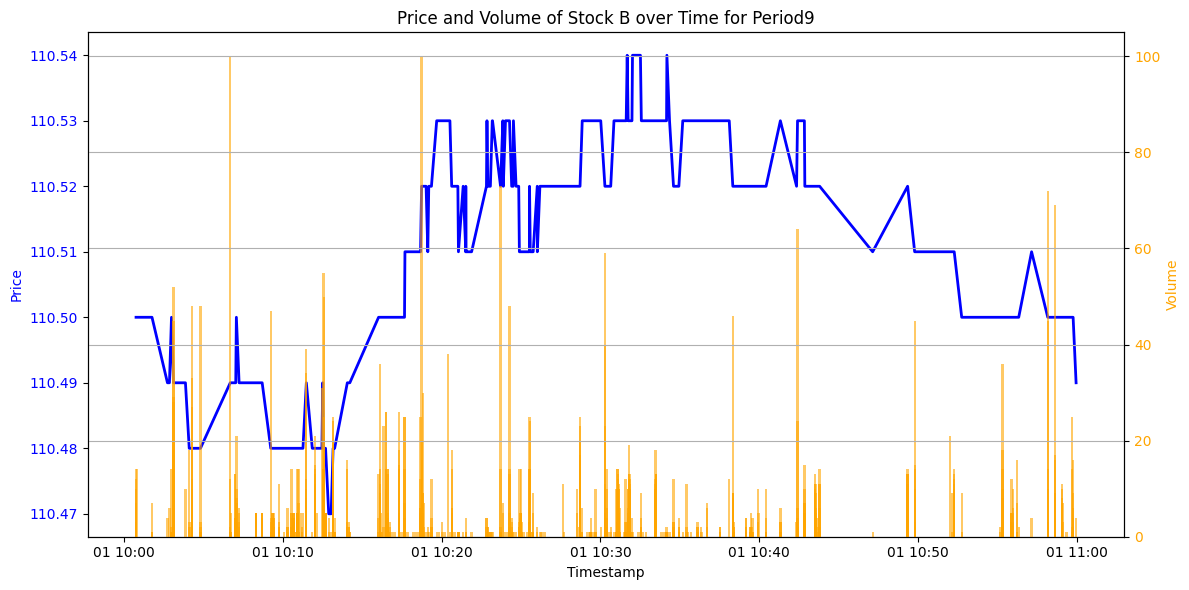

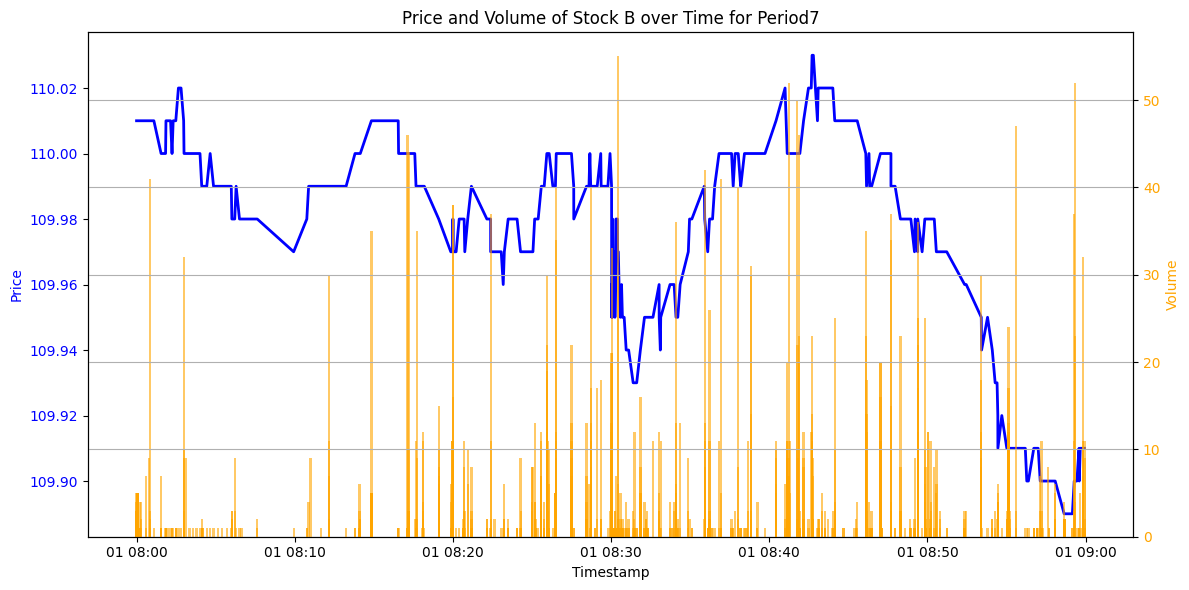

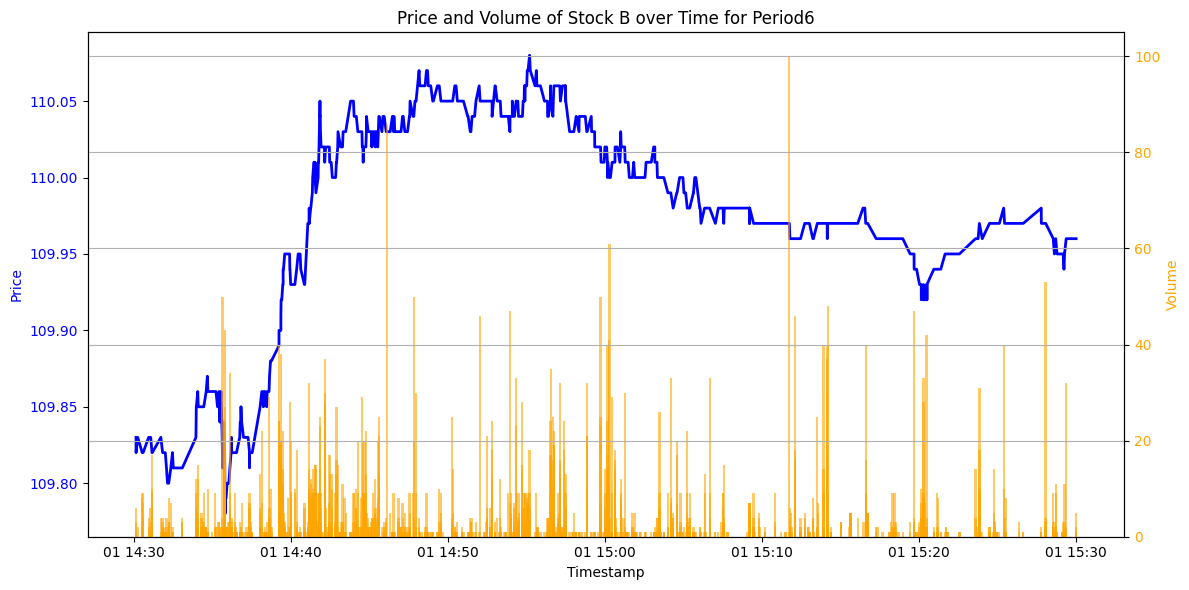

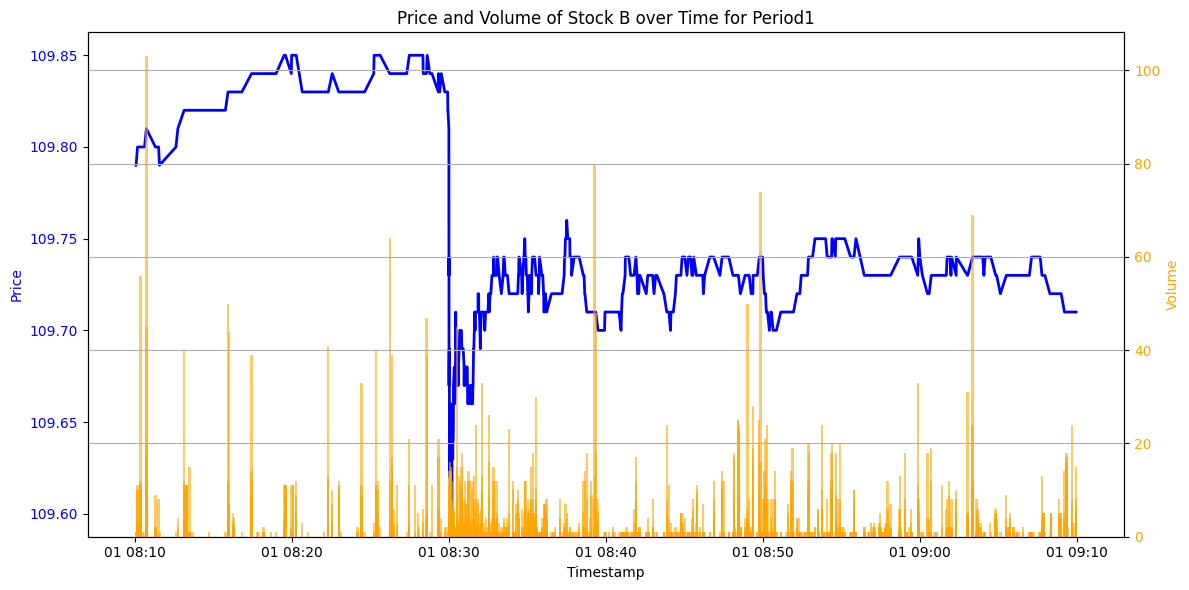

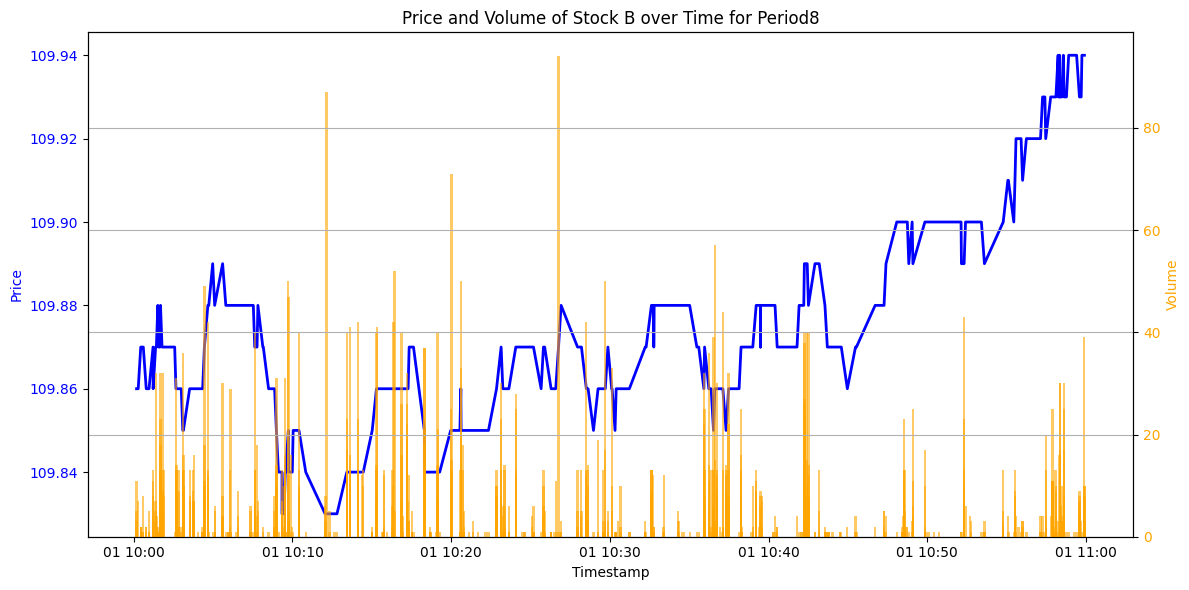

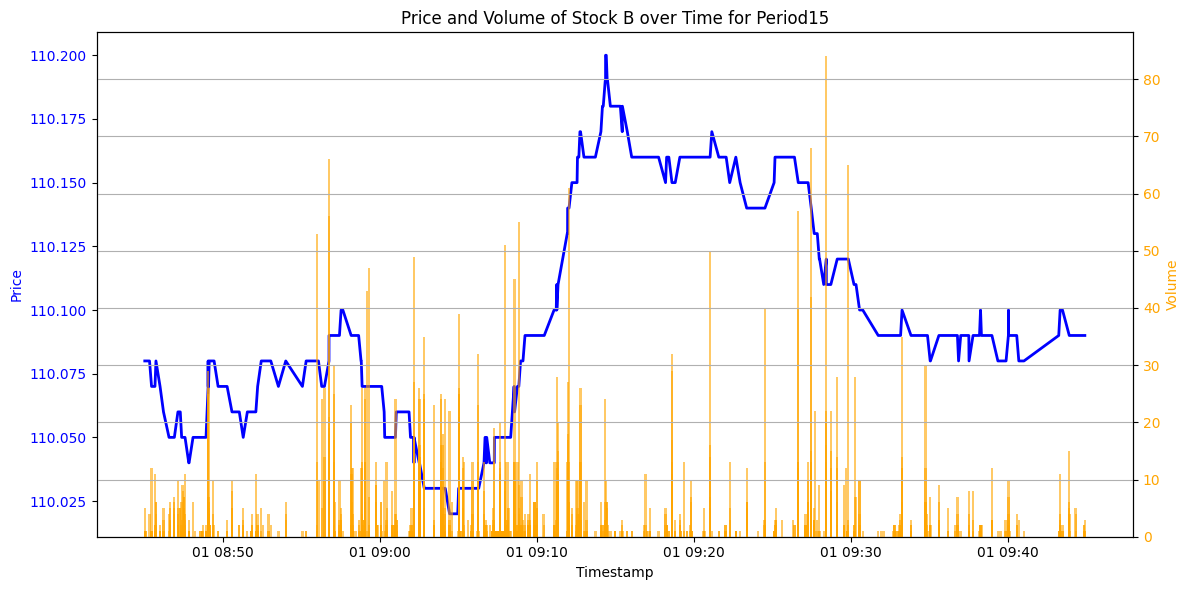

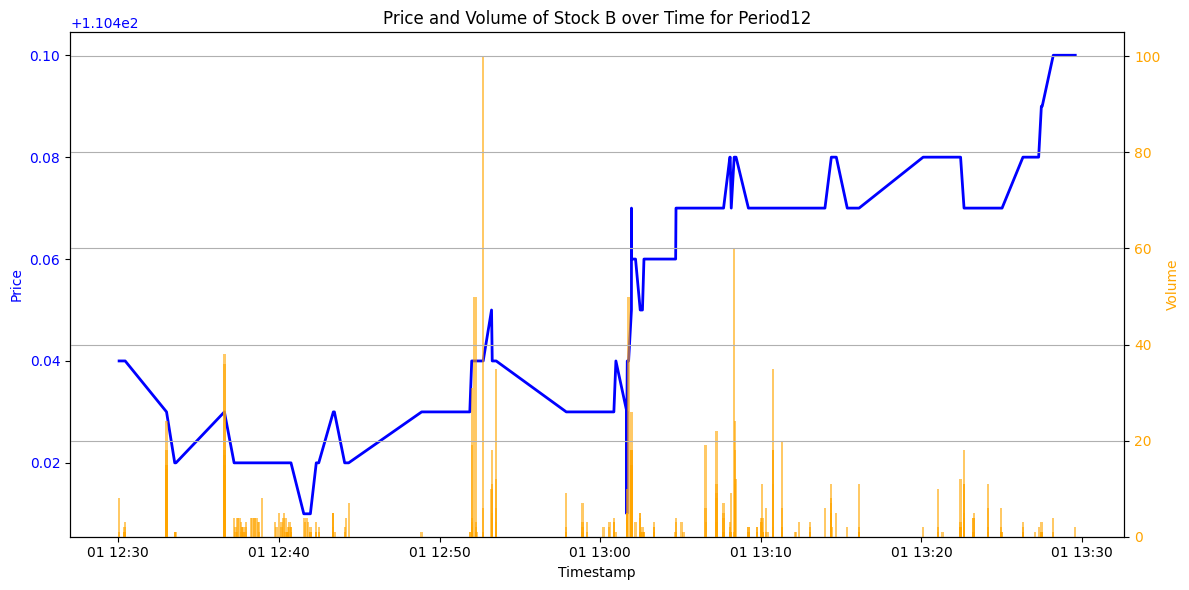

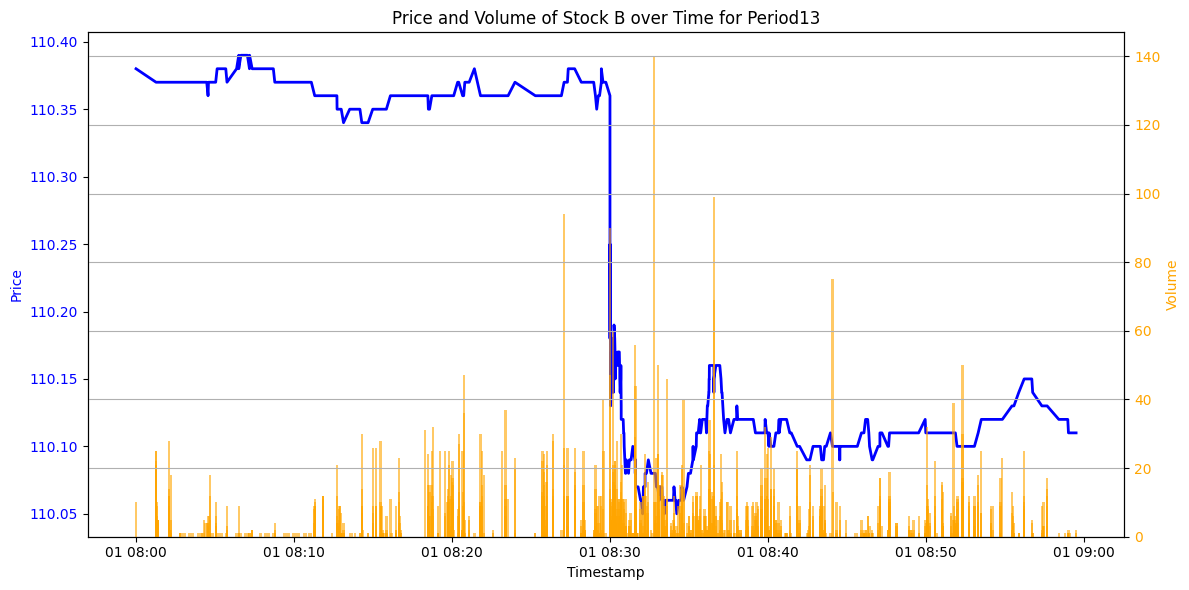

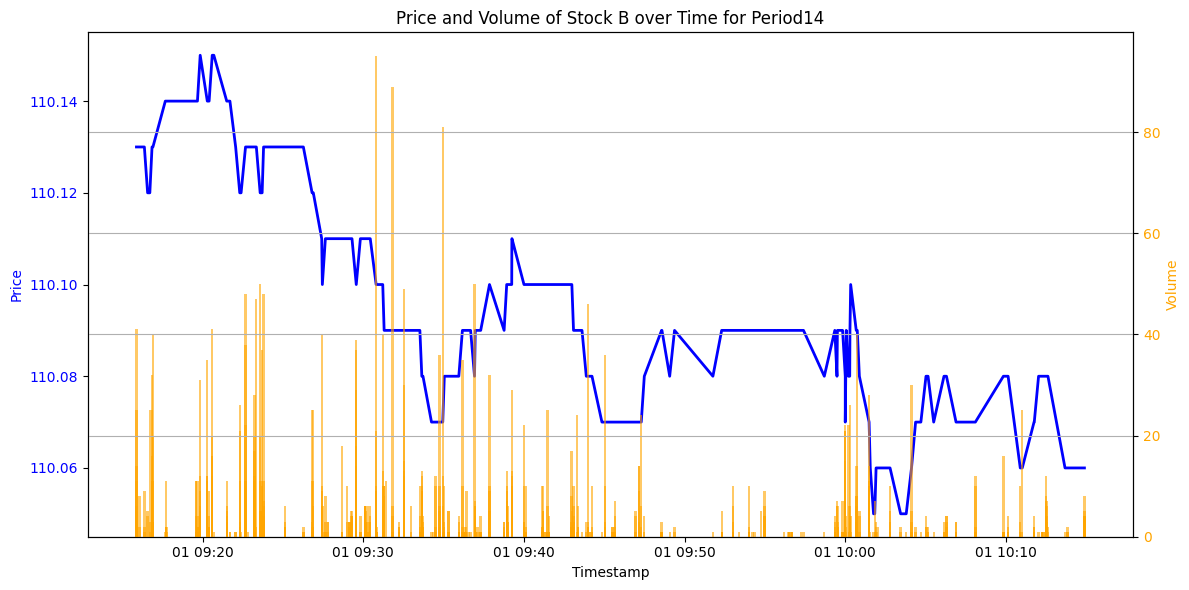

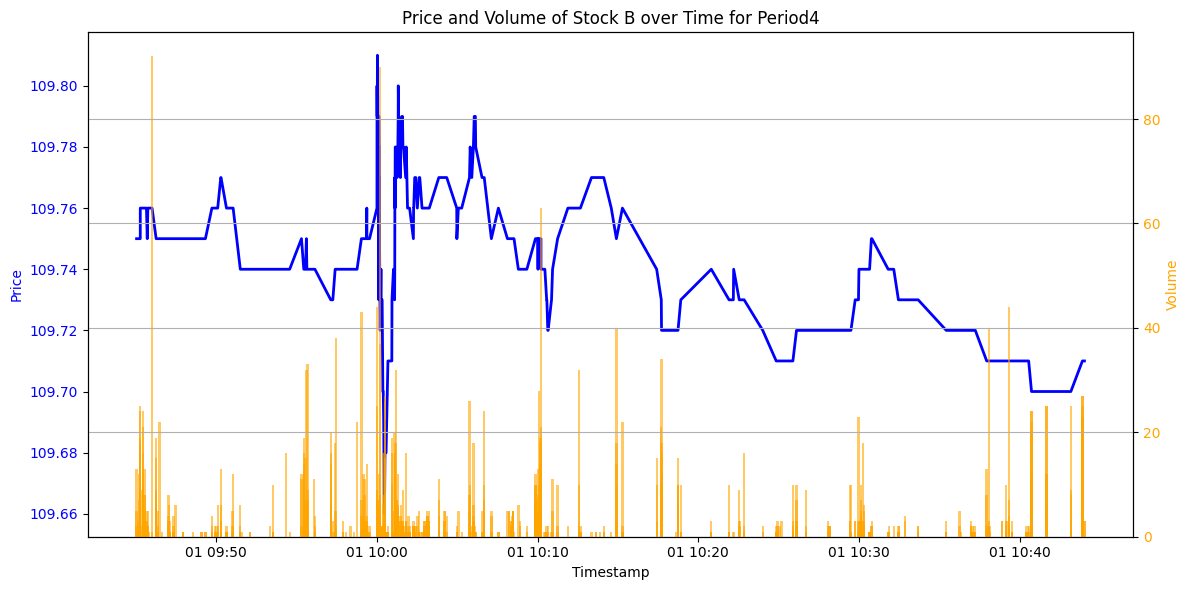

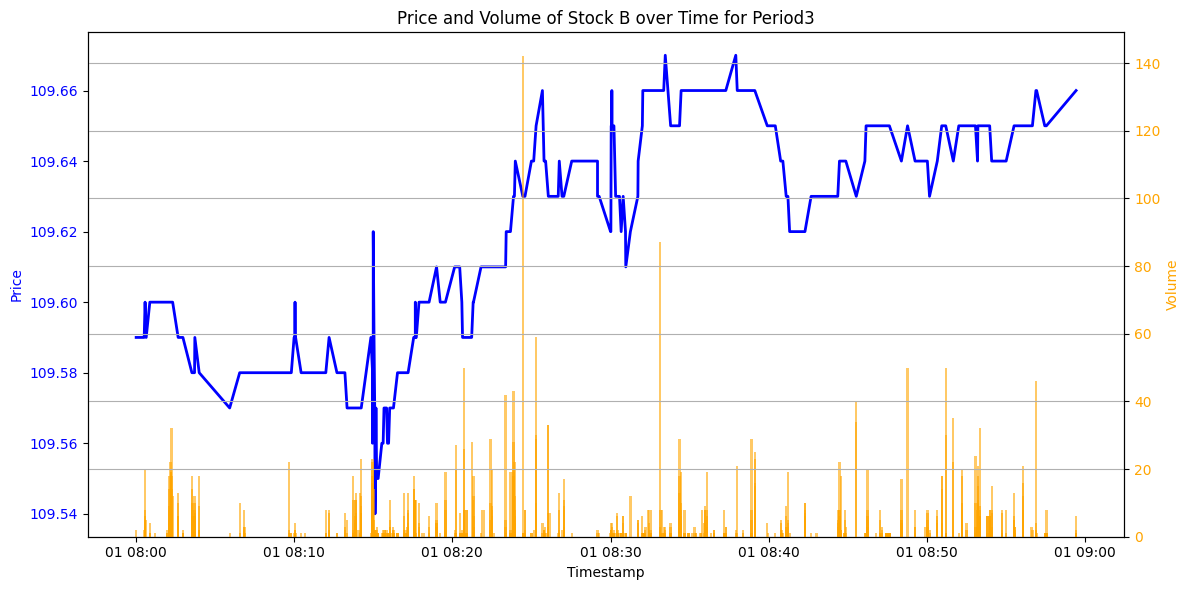

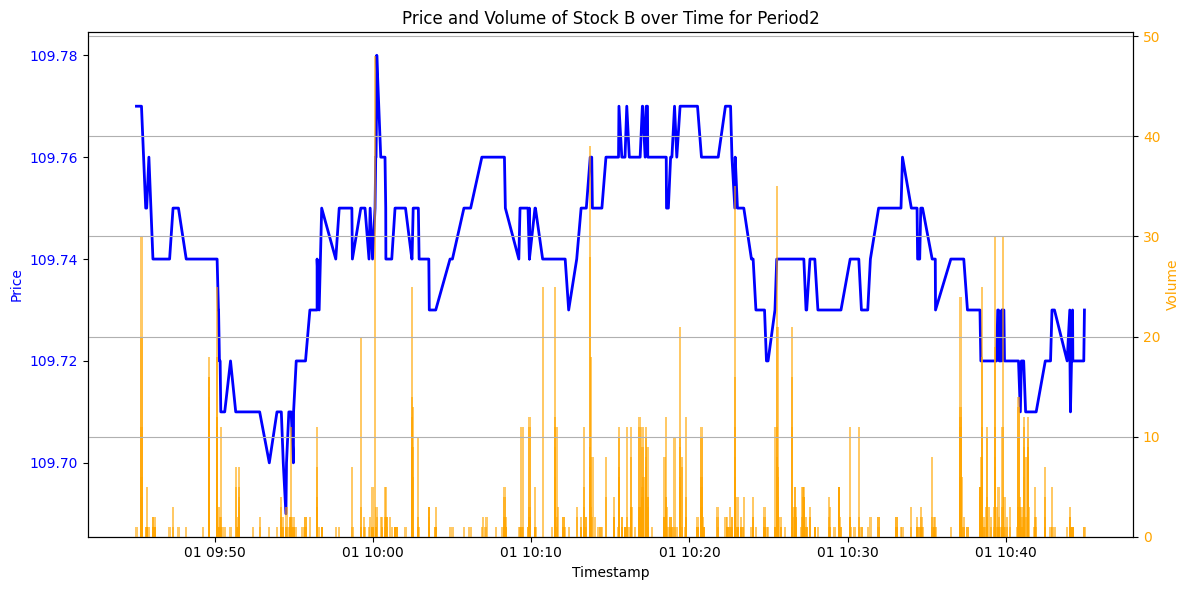

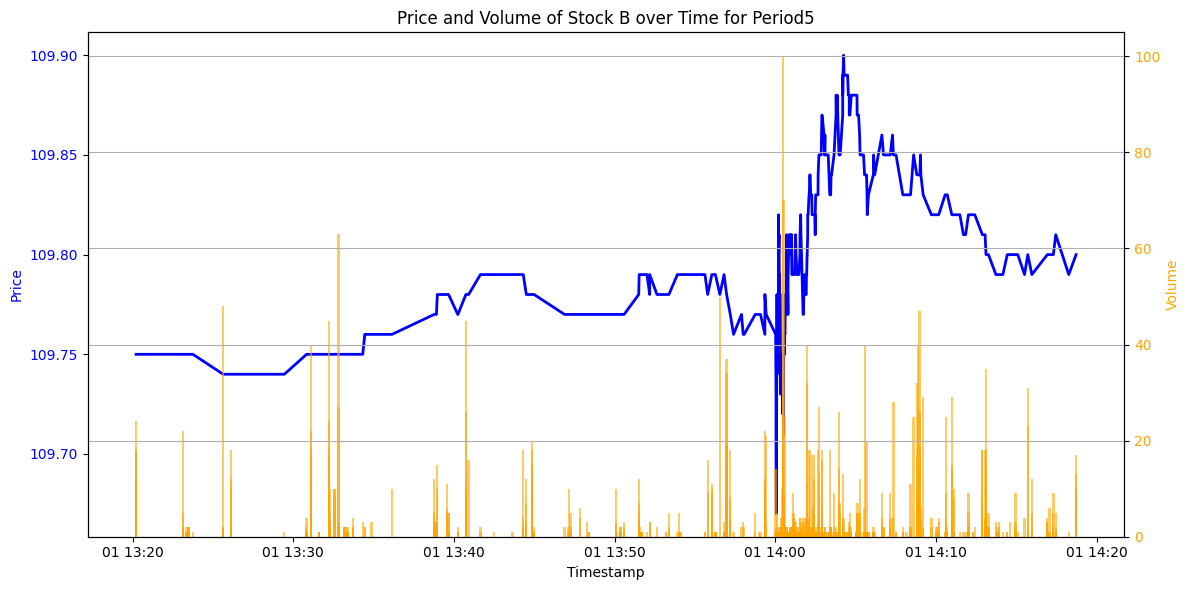

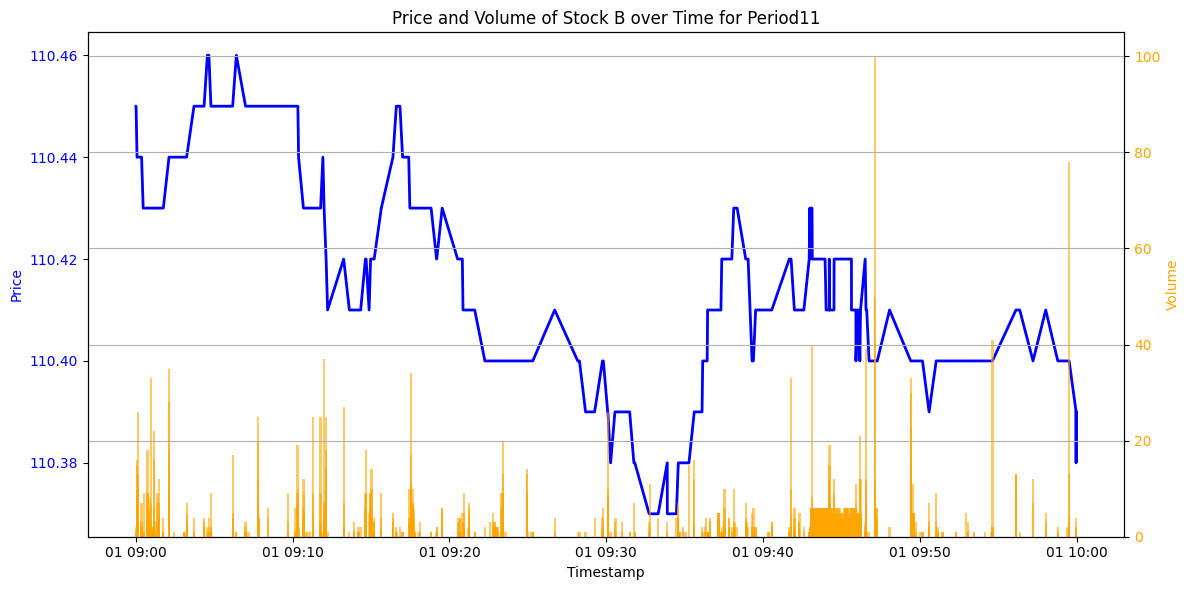

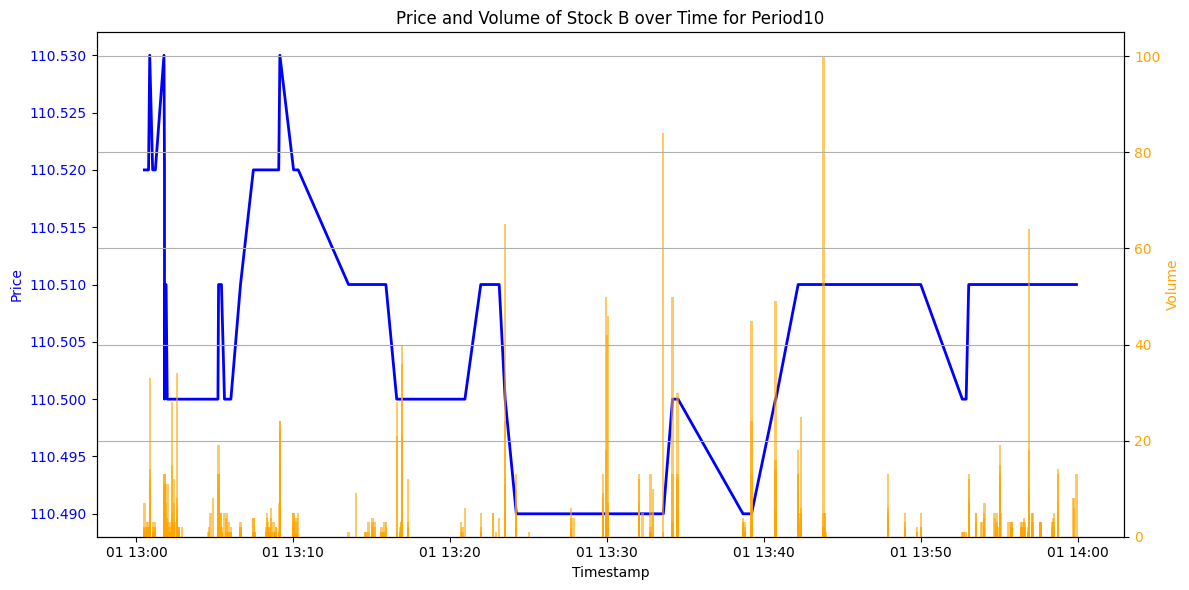

In [35]:
plot_price_and_volume_together(data)